In [1]:
import numpy as np
import pandas as pd
import time
import graphviz
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [2]:
k = 64

In [3]:
census_data = pd.read_csv('ano-data/census/'+str(k)+'_census.csv',header = 0,sep=',',engine='python',na_values='?')
census_test = pd.read_csv('ano-data/census/'+str(1)+'_census_test.csv',header = 0,sep=',',engine='python',na_values='?')

In [4]:
census_data.drop(census_data.columns[0], axis=1,inplace = True)
census_test.drop(census_test.columns[0], axis=1,inplace = True)

In [5]:
data_feature = census_data.drop(columns=['income']).copy()
data_label = census_data['income'].copy()

test_feature = census_test.drop(columns=['income']).copy()
test_label = census_test['income'].copy()

for i in range(len(test_label)):
    test_label.loc[i]=str(test_label.loc[i]).strip('.')

In [6]:
def Accuracy(predicted, truth):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i]==truth.iloc[i]:
            correct +=1
    return correct/len(predicted)

In [7]:
print("Minimum expected accuracy: "+str(data_label.value_counts().max()/data_label.value_counts().sum()*100))
print("Minimum expected accuracy: "+str(test_label.value_counts().max()/test_label.value_counts().sum()*100))

Minimum expected accuracy: 75.91904425539757
Minimum expected accuracy: 76.3773723972729


In [8]:
#Converting labels to 0-1
for i in range(data_label.shape[0]):
    data_label.iloc[i]=int("<" in data_label.iloc[i])
for i in range(test_label.shape[0]):
    test_label.iloc[i]=int("<" in test_label.iloc[i])

In [9]:
#NOSCALE
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

data_feature, val_feature, data_label, val_label = train_test_split(data_feature, data_label, test_size=0.15, random_state=42,stratify = data_label)

SIZES = [2,4,8,16,32,64]
times = np.zeros(len(SIZES))
accs = np.zeros(len(SIZES))

for i in range(len(SIZES)):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu', input_dim = data_feature.shape[1]))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    clb = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
    start = time.time()
    classifier.fit(data_feature, data_label, batch_size = 8, nb_epoch = 100,validation_data=(val_feature,val_label),callbacks=clb)
    times[i]=time.time()-start
    y_pred = classifier.predict(test_feature)
    y_pred = np.array([int(y>0.5) for y in y_pred])
    accs[i]=Accuracy(y_pred,test_label)

/home/pkovacs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python

Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 9s 321us/step - loss: 0.5753 - acc: 0.7589 - val_loss: 0.5520 - val_acc: 0.7593
Epoch 2/100
27676/27676 [==============================] - 8s 295us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5519 - val_acc: 0.7593
Epoch 3/100
27676/27676 [==============================] - 10s 369us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5519 - val_acc: 0.7593
Epoch 4/100
27676/27676 [==============================] - 10s 359us/step - loss: 0.5520 - acc: 0.7592 - val_loss: 0.5520 - val_acc: 0.7593
Epoch 5/100
27676/27676 [==============================] - 9s 337us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5519 - val_acc: 0.7593
Epoch 6/100
27676/27676 [==============================] - 10s 357us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5520 - val_acc: 0.7593
Epoch 7/100
27676/27676 [==============================] - 10s 357us/step - loss: 0.5521 - acc: 0.7592 - val_loss:

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=4, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`


Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 11s 383us/step - loss: 0.4726 - acc: 0.7644 - val_loss: 0.3905 - val_acc: 0.8111
Epoch 2/100
27676/27676 [==============================] - 9s 336us/step - loss: 0.3856 - acc: 0.8093 - val_loss: 0.3734 - val_acc: 0.8182
Epoch 3/100
27676/27676 [==============================] - 10s 368us/step - loss: 0.3768 - acc: 0.8107 - val_loss: 0.3728 - val_acc: 0.8123
Epoch 4/100
27676/27676 [==============================] - 9s 338us/step - loss: 0.5443 - acc: 0.8076 - val_loss: 1.0949 - val_acc: 0.8006
Epoch 5/100
27676/27676 [==============================] - 10s 370us/step - loss: 1.1443 - acc: 0.7930 - val_loss: 1.0930 - val_acc: 0.8002
Epoch 6/100
27676/27676 [==============================] - 9s 337us/step - loss: 1.1428 - acc: 0.7929 - val_loss: 1.0993 - val_acc: 0.7977
Epoch 7/100
27676/27676 [==============================] - 9s 337us/step - loss: 1.1417 - acc: 0.7955 - val_loss: 

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=8, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`


Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 12s 429us/step - loss: 0.4364 - acc: 0.8006 - val_loss: 0.3615 - val_acc: 0.8233
Epoch 2/100
27676/27676 [==============================] - 11s 392us/step - loss: 0.3530 - acc: 0.8316 - val_loss: 0.3431 - val_acc: 0.8395
Epoch 3/100
27676/27676 [==============================] - 11s 405us/step - loss: 0.3458 - acc: 0.8364 - val_loss: 0.3384 - val_acc: 0.8454
Epoch 4/100
27676/27676 [==============================] - 10s 355us/step - loss: 0.5299 - acc: 0.8236 - val_loss: 1.1055 - val_acc: 0.7932
Epoch 5/100
27676/27676 [==============================] - 10s 344us/step - loss: 1.1453 - acc: 0.7934 - val_loss: 1.0968 - val_acc: 0.7990
Epoch 6/100
27676/27676 [==============================] - 10s 374us/step - loss: 1.1414 - acc: 0.7939 - val_loss: 1.0887 - val_acc: 0.7996
Epoch 7/100
27676/27676 [==============================] - 10s 348us/step - loss: 1.1387 - acc: 0.7936 - val_lo

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=16, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`


Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 10s 358us/step - loss: 0.4771 - acc: 0.7817 - val_loss: 1.1021 - val_acc: 0.7605
Epoch 2/100
27676/27676 [==============================] - 10s 344us/step - loss: 1.1475 - acc: 0.7909 - val_loss: 1.0924 - val_acc: 0.8027
Epoch 3/100
27676/27676 [==============================] - 10s 348us/step - loss: 1.1406 - acc: 0.7934 - val_loss: 1.0894 - val_acc: 0.8033
Epoch 4/100
27676/27676 [==============================] - 9s 329us/step - loss: 1.1385 - acc: 0.7936 - val_loss: 1.0902 - val_acc: 0.7951
Epoch 5/100
27676/27676 [==============================] - 7s 266us/step - loss: 1.1365 - acc: 0.7952 - val_loss: 1.0970 - val_acc: 0.7953
Epoch 6/100
27676/27676 [==============================] - 7s 268us/step - loss: 1.1347 - acc: 0.7958 - val_loss: 1.0856 - val_acc: 0.8029
Epoch 7/100
27676/27676 [==============================] - 7s 265us/step - loss: 1.1339 - acc: 0.7966 - val_loss: 

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=32, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`


Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 7s 270us/step - loss: 0.4662 - acc: 0.8050 - val_loss: 0.3558 - val_acc: 0.8227
Epoch 2/100
27676/27676 [==============================] - 7s 254us/step - loss: 0.3489 - acc: 0.8308 - val_loss: 0.3440 - val_acc: 0.8356
Epoch 3/100
27676/27676 [==============================] - 7s 269us/step - loss: 0.3449 - acc: 0.8371 - val_loss: 0.3342 - val_acc: 0.8418
Epoch 4/100
27676/27676 [==============================] - 8s 296us/step - loss: 0.3398 - acc: 0.8377 - val_loss: 0.3612 - val_acc: 0.8330
Epoch 5/100
27676/27676 [==============================] - 8s 292us/step - loss: 0.3375 - acc: 0.8411 - val_loss: 0.3339 - val_acc: 0.8407
Epoch 6/100
27676/27676 [==============================] - 8s 287us/step - loss: 0.3330 - acc: 0.8420 - val_loss: 0.3418 - val_acc: 0.8342
Epoch 7/100
27676/27676 [==============================] - 7s 250us/step - loss: 0.3313 - acc: 0.8448 - val_loss: 0.3

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=64, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`


Train on 27676 samples, validate on 4885 samples
Epoch 1/100
27676/27676 [==============================] - 7s 261us/step - loss: 0.5897 - acc: 0.8004 - val_loss: 1.0909 - val_acc: 0.8025
Epoch 2/100
27676/27676 [==============================] - 7s 260us/step - loss: 1.1424 - acc: 0.7965 - val_loss: 1.1007 - val_acc: 0.7924
Epoch 3/100
27676/27676 [==============================] - 7s 261us/step - loss: 1.1377 - acc: 0.7964 - val_loss: 1.0853 - val_acc: 0.8076
Epoch 4/100
27676/27676 [==============================] - 7s 267us/step - loss: 1.1375 - acc: 0.7965 - val_loss: 1.0881 - val_acc: 0.8061
Epoch 5/100
27676/27676 [==============================] - 7s 266us/step - loss: 1.1342 - acc: 0.7973 - val_loss: 1.0923 - val_acc: 0.7910
Epoch 6/100
27676/27676 [==============================] - 7s 265us/step - loss: 1.1328 - acc: 0.7971 - val_loss: 1.0822 - val_acc: 0.8057
Epoch 7/100
27676/27676 [==============================] - 7s 262us/step - loss: 1.1322 - acc: 0.7961 - val_loss: 1.0

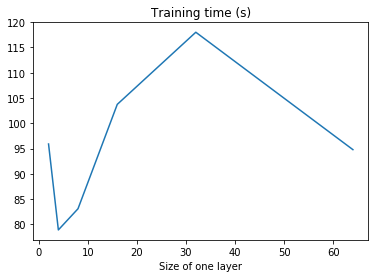

In [10]:
plt.plot(SIZES,times)
plt.xlabel("Size of one layer")
plt.title("Training time (s)")
plt.savefig("CensusIncome_NN_traintime_noscaled.png")

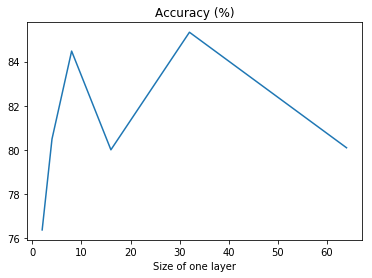

In [11]:
plt.plot(SIZES,accs*100)
plt.xlabel("Size of one layer")
plt.title("Accuracy (%)")
plt.savefig("CensusIncome_NN_Accuracy_noscaled.png")

In [12]:
##############################################TODO#######################################################################
#A HOLDOUT OR CROSSVALIDATION HAS TO BE ADDED TO KNOW WHEN TO STOP THE TRAINING.
#This can be added in a Callback func

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

#This fckin scaling is unreasonably important, without this the training radomly jumps and gets stuck in a bad place...
#include this in the report, maybe with some shown examples.... (I have no idea why it happens.)

sc = StandardScaler()
data_feature = sc.fit_transform(data_feature)
test_feature = sc.transform(test_feature)

data_feature, val_feature, data_label, val_label = train_test_split(data_feature, data_label, test_size=0.15, random_state=42,stratify = data_label)

SIZES = [2,4,8,16,32,64]
times_scal = np.zeros(len(SIZES))
accs_scal = np.zeros(len(SIZES))

for i in range(len(SIZES)):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu', input_dim = data_feature.shape[1]))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    clb = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
    start = time.time()
    classifier.fit(data_feature, data_label, batch_size = 8, nb_epoch = 100,validation_data=(val_feature,val_label),callbacks=clb)
    times_scal[i]=time.time()-start
    y_pred = classifier.predict(test_feature)
    y_pred = np.array([int(y>0.5) for y in y_pred])
    accs_scal[i]=Accuracy(y_pred,test_label)

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 7s 281us/step - loss: 0.5798 - acc: 0.7590 - val_loss: 0.5526 - val_acc: 0.7592
Epoch 2/100
23524/23524 [==============================] - 6s 263us/step - loss: 0.5522 - acc: 0.7592 - val_loss: 0.5521 - val_acc: 0.7592
Epoch 3/100
23524/23524 [==============================] - 6s 259us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5521 - val_acc: 0.7592
Epoch 4/100
23524/23524 [==============================] - 6s 256us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5521 - val_acc: 0.7592
Epoch 5/100
23524/23524 [==============================] - 6s 257us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5521 - val_acc: 0.7592
Epoch 6/100
23524/23524 [==============================] - 6s 258us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5521 - val_acc: 0.7592
Epoch 7/100
23524/23524 [==============================] - 6s 268us/step - loss: 0.5521 - acc: 0.7592 - val_loss: 0.5

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=4, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 6s 268us/step - loss: 0.3842 - acc: 0.8090 - val_loss: 0.3452 - val_acc: 0.8442
Epoch 2/100
23524/23524 [==============================] - 6s 255us/step - loss: 0.3412 - acc: 0.8442 - val_loss: 0.3331 - val_acc: 0.8456
Epoch 3/100
23524/23524 [==============================] - 6s 251us/step - loss: 0.3337 - acc: 0.8447 - val_loss: 0.3289 - val_acc: 0.8459
Epoch 4/100
23524/23524 [==============================] - 6s 264us/step - loss: 0.3296 - acc: 0.8473 - val_loss: 0.3283 - val_acc: 0.8490
Epoch 5/100
23524/23524 [==============================] - 6s 251us/step - loss: 0.3275 - acc: 0.8476 - val_loss: 0.3278 - val_acc: 0.8478
Epoch 6/100
23524/23524 [==============================] - 6s 253us/step - loss: 0.3261 - acc: 0.8466 - val_loss: 0.3280 - val_acc: 0.8502
Epoch 7/100
23524/23524 [==============================] - 6s 249us/step - loss: 0.3254 - acc: 0.8476 - val_loss: 0.3

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=8, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 6s 267us/step - loss: 0.3737 - acc: 0.8196 - val_loss: 0.3406 - val_acc: 0.8497
Epoch 2/100
23524/23524 [==============================] - 6s 249us/step - loss: 0.3344 - acc: 0.8489 - val_loss: 0.3278 - val_acc: 0.8560
Epoch 3/100
23524/23524 [==============================] - 6s 252us/step - loss: 0.3263 - acc: 0.8502 - val_loss: 0.3217 - val_acc: 0.8528
Epoch 4/100
23524/23524 [==============================] - 6s 252us/step - loss: 0.3212 - acc: 0.8511 - val_loss: 0.3208 - val_acc: 0.8553
Epoch 5/100
23524/23524 [==============================] - 6s 252us/step - loss: 0.3191 - acc: 0.8520 - val_loss: 0.3221 - val_acc: 0.8562
Epoch 6/100
23524/23524 [==============================] - 6s 251us/step - loss: 0.3163 - acc: 0.8547 - val_loss: 0.3214 - val_acc: 0.8548
Epoch 7/100
23524/23524 [==============================] - 6s 251us/step - loss: 0.3147 - acc: 0.8534 - val_loss: 0.3

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=16, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 7s 311us/step - loss: 0.3669 - acc: 0.8271 - val_loss: 0.3363 - val_acc: 0.8512
Epoch 2/100
23524/23524 [==============================] - 8s 327us/step - loss: 0.3326 - acc: 0.8499 - val_loss: 0.3278 - val_acc: 0.8545
Epoch 3/100
23524/23524 [==============================] - 6s 256us/step - loss: 0.3235 - acc: 0.8517 - val_loss: 0.3199 - val_acc: 0.8536
Epoch 4/100
23524/23524 [==============================] - 6s 257us/step - loss: 0.3176 - acc: 0.8534 - val_loss: 0.3160 - val_acc: 0.8567
Epoch 5/100
23524/23524 [==============================] - 6s 254us/step - loss: 0.3145 - acc: 0.8547 - val_loss: 0.3128 - val_acc: 0.8574
Epoch 6/100
23524/23524 [==============================] - 6s 260us/step - loss: 0.3113 - acc: 0.8547 - val_loss: 0.3127 - val_acc: 0.8584
Epoch 7/100
23524/23524 [==============================] - 6s 265us/step - loss: 0.3090 - acc: 0.8570 - val_loss: 0.3

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=32, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 7s 292us/step - loss: 0.3543 - acc: 0.8318 - val_loss: 0.3290 - val_acc: 0.8475
Epoch 2/100
23524/23524 [==============================] - 6s 260us/step - loss: 0.3215 - acc: 0.8505 - val_loss: 0.3182 - val_acc: 0.8567
Epoch 3/100
23524/23524 [==============================] - 7s 283us/step - loss: 0.3129 - acc: 0.8534 - val_loss: 0.3150 - val_acc: 0.8540
Epoch 4/100
23524/23524 [==============================] - 6s 252us/step - loss: 0.3075 - acc: 0.8565 - val_loss: 0.3128 - val_acc: 0.8560
Epoch 5/100
23524/23524 [==============================] - 6s 255us/step - loss: 0.3040 - acc: 0.8587 - val_loss: 0.3159 - val_acc: 0.8555
Epoch 6/100
23524/23524 [==============================] - 6s 274us/step - loss: 0.3006 - acc: 0.8604 - val_loss: 0.3151 - val_acc: 0.8509
Epoch 7/100
23524/23524 [==============================] - 6s 270us/step - loss: 0.2981 - acc: 0.8608 - val_loss: 0.3

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=64, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`


Train on 23524 samples, validate on 4152 samples
Epoch 1/100
23524/23524 [==============================] - 7s 307us/step - loss: 0.3422 - acc: 0.8389 - val_loss: 0.3182 - val_acc: 0.8550
Epoch 2/100
23524/23524 [==============================] - 8s 321us/step - loss: 0.3180 - acc: 0.8513 - val_loss: 0.3113 - val_acc: 0.8540
Epoch 3/100
23524/23524 [==============================] - 7s 312us/step - loss: 0.3121 - acc: 0.8539 - val_loss: 0.3101 - val_acc: 0.8550
Epoch 4/100
23524/23524 [==============================] - 7s 307us/step - loss: 0.3073 - acc: 0.8573 - val_loss: 0.3129 - val_acc: 0.8555
Epoch 5/100
23524/23524 [==============================] - 7s 303us/step - loss: 0.3033 - acc: 0.8590 - val_loss: 0.3117 - val_acc: 0.8577
Epoch 6/100
23524/23524 [==============================] - 7s 311us/step - loss: 0.2996 - acc: 0.8589 - val_loss: 0.3122 - val_acc: 0.8557
Epoch 7/100
23524/23524 [==============================] - 7s 305us/step - loss: 0.2952 - acc: 0.8632 - val_loss: 0.3

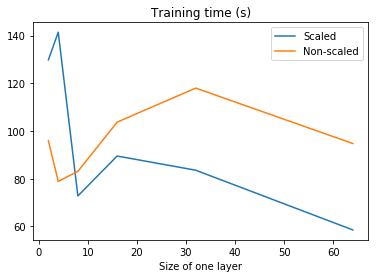

In [13]:
plt.plot(SIZES,times_scal,label = "Scaled")
plt.plot(SIZES,times,label = "Non-scaled")
plt.xlabel("Size of one layer")
plt.title("Training time (s)")
plt.legend()
plt.savefig("CensusIncome_NN_traintime.png")

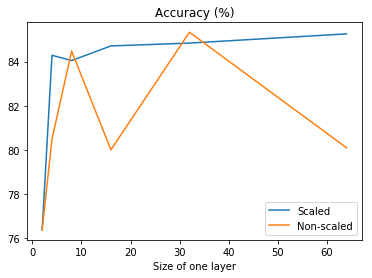

In [14]:
plt.plot(SIZES,accs_scal*100,label = "Scaled")
plt.plot(SIZES,accs*100,label = 'Non-scaled')
plt.xlabel("Size of one layer")
plt.title("Accuracy (%)")
plt.legend()
plt.savefig("CensusIncome_NN_Accuracy.png")

In [15]:
classifier.predict(test_feature)

array([[0.9895335 ],
       [0.99298805],
       [0.99981743],
       ...,
       [0.24677332],
       [0.34382343],
       [0.27831224]], dtype=float32)